# Implementation of Lasso, Ridge and Elastic Net

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [48]:
# Loading pre-defined Boston Dataset 

In [49]:
boston_dataset = datasets.load_boston() 

In [50]:
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

we need to check for a correlation between independent and dependent variable.

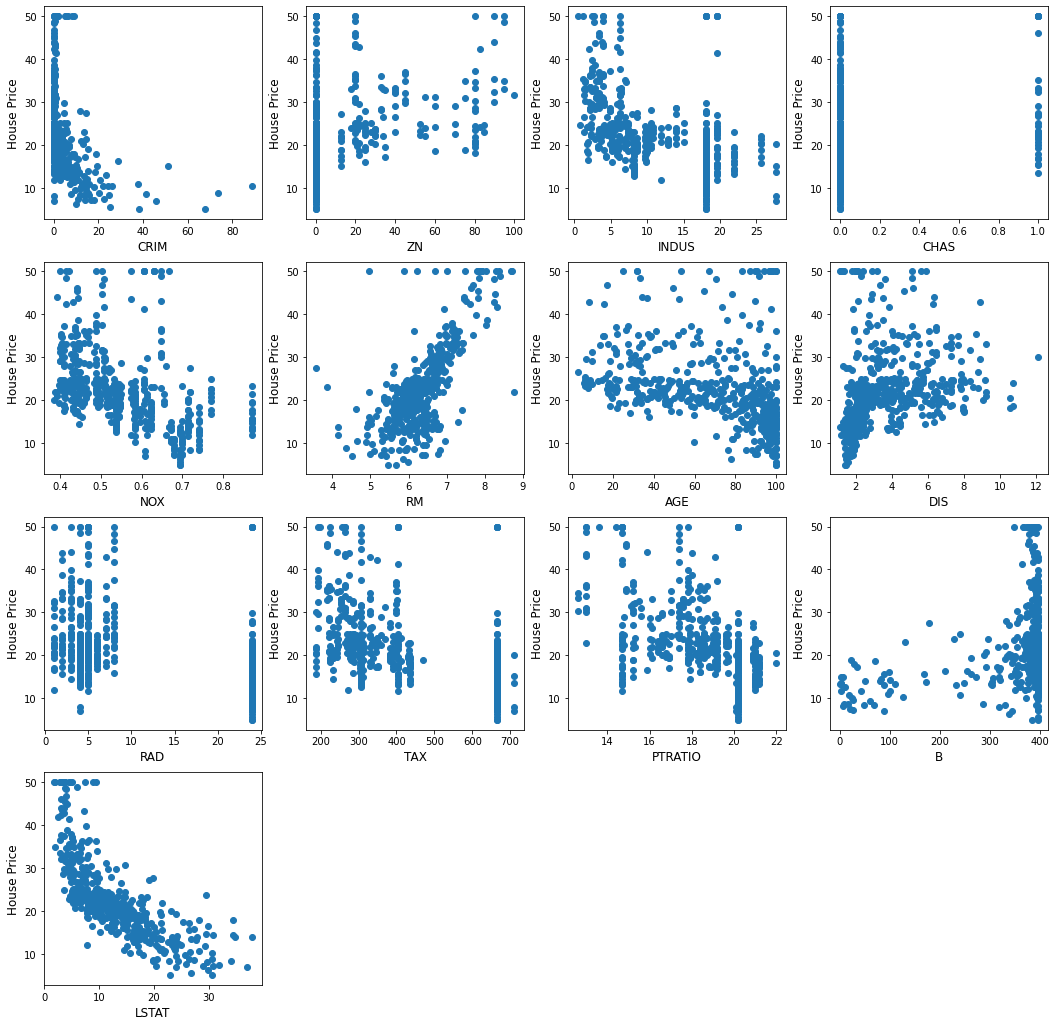

In [51]:
fig=plt.figure(figsize=(18,18))

for index, feature_name in enumerate(boston_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 
plt.show()
                        
                  

We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization.

In [52]:
# Python code to pre-process the data.


 Load the dataset into Pandas Dataframe 

In [53]:
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target=np.asarray(boston_dataset.target)
boston_pd['House Price']=pd.Series(boston_pd_target)

In [54]:
boston_pd.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
# input
x=boston_pd.iloc[:,:-1]
y=boston_pd.iloc[:,-1]


Now, we apply train-test split to divide the dataset into two parts, one for training and another for testing. We will be using 25% of the data for testing.

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [57]:
print("Train data shape of X = % s and Y = % s  "%(x_train.shape, y_train.shape)) 
  

Train data shape of X = (379, 13) and Y = (379,)  


In [58]:
print("Test data shape of X = % s and Y = % s  "%(x_test.shape, y_test.shape)) 

Test data shape of X = (127, 13) and Y = (127,)  


In [59]:
# Apply multiple Linear Regression Model

Now it’s the right time to test the models. We will be using multiple Linear Regression first. We train the model on training data and calculate the MSE on test.

In [60]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# Generate Prediction on test set 
lreg_y_pred=lreg.predict(x_test)

In [62]:
# calculating Mean Squared Error (mse) 
mse=np.mean((lreg_y_pred-y_test)**2)

In [63]:
print("Mean squared Error on test set : ", mse) 

Mean squared Error on test set :  29.782245092302535


In [64]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 

lreg_coefficient['Columns']=x_train.columns
lreg_coefficient['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.117735
1        ZN              0.044017
2     INDUS             -0.005768
3      CHAS              2.393416
4       NOX            -15.589421
5        RM              3.768968
6       AGE             -0.007035
7       DIS             -1.434956
8       RAD              0.240081
9       TAX             -0.011297
10  PTRATIO             -0.985547
11        B              0.008444
12    LSTAT             -0.499117


As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables.

# Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ridgeR=Ridge(alpha=1,random_state=0)
ridgeR.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

In [67]:
 y_pred = ridgeR.predict(x_test) 
 mse_ridge=np.mean((y_pred-y_test)**2)
 print("MSE: ", mse_ridge)

MSE:  30.504923770804737


In [68]:
# Accuracy Score
score=ridgeR.score(x_test,y_test)
print("Accuracy",score)

Accuracy 0.626618220461385


In [69]:
print('Intercept Coefficient : ',ridgeR.intercept_)

Intercept Coefficient :  31.849731779351067


In [70]:
ridgeR_coefficient = pd.DataFrame() 

ridgeR_coefficient['Columns']=x_train.columns
ridgeR_coefficient['Coefficient Estimate']= pd.Series(ridgeR.coef_)
print(ridgeR_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.114786
1        ZN              0.045418
2     INDUS             -0.035403
3      CHAS              2.303291
4       NOX             -8.127445
5        RM              3.806341
6       AGE             -0.014282
7       DIS             -1.336939
8       RAD              0.216748
9       TAX             -0.011755
10  PTRATIO             -0.903937
11        B              0.008813
12    LSTAT             -0.507425


In [71]:
coef = pd.Series(ridgeR.coef_,x_train.columns).sort_values()
coef

NOX       -8.127445
DIS       -1.336939
PTRATIO   -0.903937
LSTAT     -0.507425
CRIM      -0.114786
INDUS     -0.035403
AGE       -0.014282
TAX       -0.011755
B          0.008813
ZN         0.045418
RAD        0.216748
CHAS       2.303291
RM         3.806341
dtype: float64

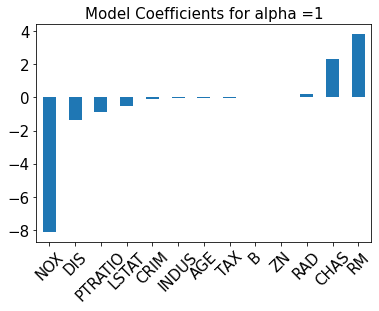

In [72]:
coef.plot(kind='bar',fontsize=15)
plt.title('Model Coefficients for alpha =1',fontsize=15)
plt.xticks(rotation=45)
plt.show()

For alpha=10

In [73]:
ridgeR=Ridge(alpha=10,random_state=0)
ridgeR.fit(x_train,y_train)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

In [74]:
 y_pred = ridgeR.predict(x_test) 
 mse_ridge=np.mean((y_pred-y_test)**2)
 print("MSE: ", mse_ridge)
 # Accuracy Score
score=ridgeR.score(x_test,y_test)
print("Accuracy",score)

MSE:  31.59486345186054
Accuracy 0.6132773047206989


In [75]:
print('Intercept Coefficient : ',ridgeR.intercept_)
ridgeR_coefficient = pd.DataFrame() 

ridgeR_coefficient['Columns']=x_train.columns
ridgeR_coefficient['Coefficient Estimate']= pd.Series(ridgeR.coef_)
print(ridgeR_coefficient)

Intercept Coefficient :  29.659431257531516
    Columns  Coefficient Estimate
0      CRIM             -0.112354
1        ZN              0.047958
2     INDUS             -0.061007
3      CHAS              1.686242
4       NOX             -1.539622
5        RM              3.555774
6       AGE             -0.018253
7       DIS             -1.253347
8       RAD              0.207213
9       TAX             -0.012624
10  PTRATIO             -0.847319
11        B              0.009084
12    LSTAT             -0.535540


In [76]:
coef = pd.Series(ridgeR.coef_,x_train.columns).sort_values()
coef

NOX       -1.539622
DIS       -1.253347
PTRATIO   -0.847319
LSTAT     -0.535540
CRIM      -0.112354
INDUS     -0.061007
AGE       -0.018253
TAX       -0.012624
B          0.009084
ZN         0.047958
RAD        0.207213
CHAS       1.686242
RM         3.555774
dtype: float64

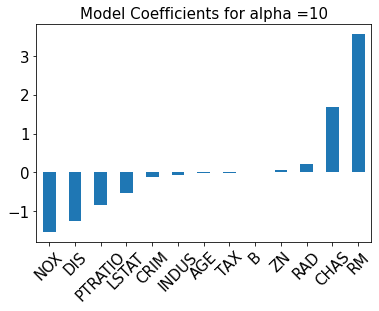

In [77]:
coef.plot(kind='bar',fontsize=15)
plt.title('Model Coefficients for alpha =10',fontsize=15)
plt.xticks(rotation=45)
plt.show()

As we can observe from the above plots that \alpha helps in regularizing the coefficient and make them converge faster.
Notice that the above graphs can be misleading in a way that it shows some of the coefficients become zero. In Ridge Regularization, the coefficients can never be 0, they are just too small to observe in above plots.

# Lasso Regression

Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.

In [78]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

In [80]:
y_pred1=lasso.predict(x_test)
mse_lasso=np.mean((y_pred1-y_test)**2)
print("MEan Square Error=",mse_lasso)
#Accuracy
l_score=lasso.score(x_test,y_test)
print("Accuracy", l_score)

MEan Square Error= 36.63182007429978
Accuracy 0.5516247059049908


In [83]:
print("Intercept=", lasso.intercept_)
lasso_coeff=pd.DataFrame()
lasso_coeff['Columns']=x_train.columns
lasso_coeff['Coefficients Estimate']=lasso.coef_
lasso_coeff

Intercept= 44.73153183302302


,Columns,Coefficients Estimate
0,CRIM,-0.058738
1,ZN,0.049994
2,INDUS,-0.001589
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.761785
6,AGE,0.013047
7,DIS,-0.710109
8,RAD,0.195516
9,TAX,-0.014148


In [84]:
coef_lasso = pd.Series(lasso.coef_,x_train.columns).sort_values()
coef_lasso

PTRATIO   -0.805246
LSTAT     -0.742146
DIS       -0.710109
CRIM      -0.058738
TAX       -0.014148
INDUS     -0.001589
CHAS       0.000000
NOX       -0.000000
B          0.007098
AGE        0.013047
ZN         0.049994
RAD        0.195516
RM         0.761785
dtype: float64

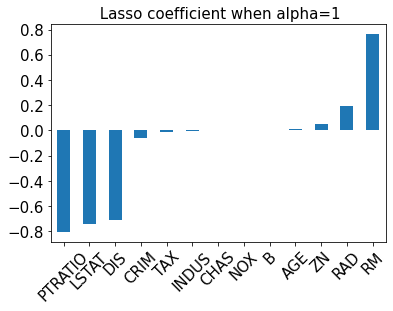

In [87]:
coef_lasso.plot(kind='bar',fontsize=15)
plt.xticks(rotation=45)
plt.title(" Lasso coefficient when alpha=1",fontsize=15)
plt.show()

For alpha=10

In [88]:
lasso=Lasso(alpha=10,random_state=0)
lasso.fit(x_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

In [89]:
y_pred1=lasso.predict(x_test)
mse_lasso=np.mean((y_pred1-y_test)**2)
print("MEan Square Error=",mse_lasso)
#Accuracy
l_score=lasso.score(x_test,y_test)
print("Accuracy", l_score)

MEan Square Error= 49.09161621793307
Accuracy 0.3991161832890223


In [98]:
print("Intercept=", lasso.intercept_)
lasso_coeff=pd.DataFrame()
lasso_coeff['Columns']=x_train.columns
lasso_coeff['Coefficients Estimate']=lasso.coef_
lasso_coeff

Intercept= 31.341267677598346


,Columns,Coefficients Estimate
0,CRIM,-0.000000
1,ZN,0.032687
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,0.000000
5,RM,0.000000
6,AGE,0.000000
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.011559


In [99]:
coef_lasso = pd.Series(lasso.coef_,x_train.columns).sort_values()
coef_lasso

LSTAT     -0.549712
TAX       -0.011559
CRIM      -0.000000
INDUS     -0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS       -0.000000
RAD        0.000000
PTRATIO   -0.000000
B          0.006793
ZN         0.032687
dtype: float64

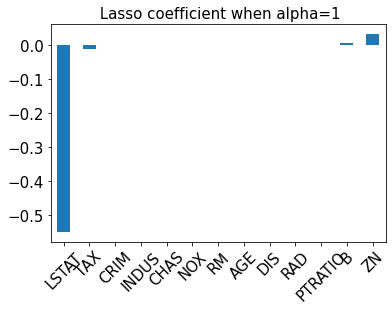

In [100]:
coef_lasso.plot(kind='bar',fontsize=15)
plt.xticks(rotation=45)
plt.title(" Lasso coefficient when alpha=1",fontsize=15)
plt.show()

In [91]:
from sklearn.linear_model import ElasticNet

## Conclusion 

#### *Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.*

#### Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.

#### Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.

####  Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.
